In [35]:
import pandas as pd
import numpy as np
import json
import random
!pip install gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter

In [36]:
#lda_topics = ['talk.politics.mideast', 'rec.sport.hockey', 'soc.religion.christian', 'sci.crypt', 'comp.graphics']

In [37]:
labels = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic"]

batch_files = ['usanews.csv', 'foxnews0.csv', 'foxnews1.csv', 'foxnews2.csv', 'foxnews3.csv', 
                'nogla0.csv','pew0.csv', 'rae0_0.csv', 
                 'rae0_1.csv', 'terror0_0.csv', 'terror0_1.csv']

vid_files = ["foxnews_FULL.csv", "rae_FULL.csv",  "terror_FULL.csv",
             "usanews.csv" , "pew0.csv", "nogla0.csv", "drdisrespect_FULL.csv"]
genre_files = ["gaming_channels_GENRE.csv", "news_channel_GENRE.csv" ]

files = []
files.extend(vid_files)
files.extend(genre_files)
print(files)

['foxnews_FULL.csv', 'rae_FULL.csv', 'terror_FULL.csv', 'usanews.csv', 'pew0.csv', 'nogla0.csv', 'drdisrespect_FULL.csv', 'gaming_channels_GENRE.csv', 'news_channel_GENRE.csv']


In [38]:
from operator import itemgetter

src_folder = "../Annotations/CSVs/"

df = pd.read_csv(src_folder + 'news_channel_GENRE.csv', index_col = 0)
df["words"] = df["words"].replace(np.nan, '', regex=True).apply(str)
texts = df["words"].map(lambda x: x.split(' '))
dictionary = Dictionary(texts)

dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

corpus = [dictionary.doc2bow(text) for text in texts]

topic_nums = list(np.arange(5, 100 + 1, 5))

coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)

100


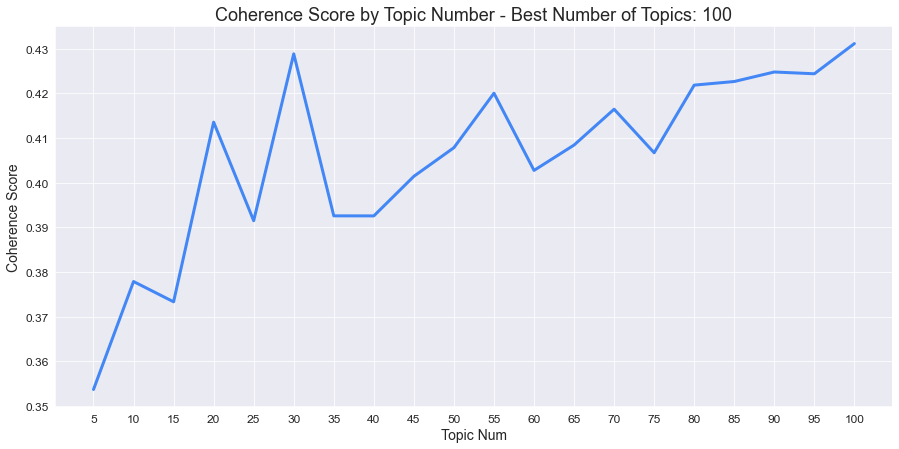

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
dest_folder = "COH/"

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

file_name = 'c_scoreNews'

fig.savefig(
    dest_folder + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()

In [40]:
from operator import itemgetter

src_folder = "../Annotations/CSVs/"

df = pd.read_csv(src_folder + 'gaming_channels_GENRE.csv', index_col = 0)
df["words"] = df["words"].replace(np.nan, '', regex=True).apply(str)
texts = df["words"].map(lambda x: x.split(' '))
dictionary = Dictionary(texts)

dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

corpus = [dictionary.doc2bow(text) for text in texts]

topic_nums = list(np.arange(5, 100 + 1, 5))

coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)

5


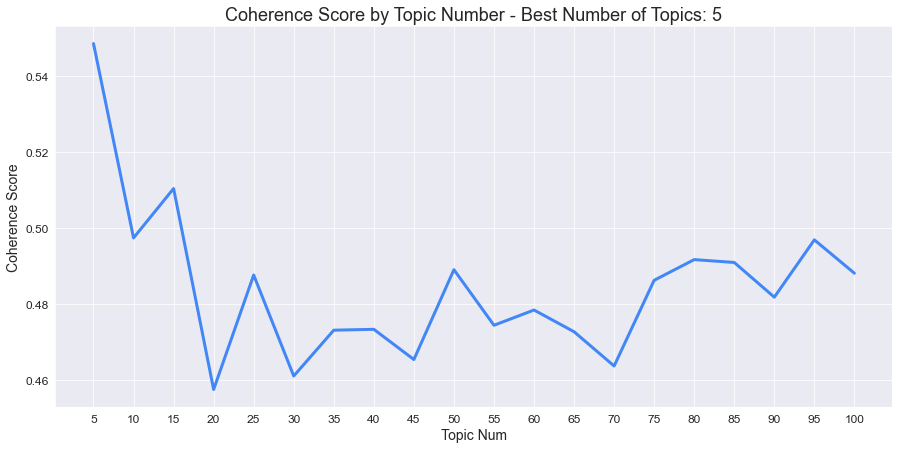

In [41]:
# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

file_name = 'c_scoreGaming'

fig.savefig(
    dest_folder + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)

plt.show()